In [3]:
import os

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install kaggle

# Download the Alzheimer's Disease Dataset from Kaggle
dataset_name = 'umerrtx/machine-failure-prediction-using-sensor-data'

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_name}

# Unzip the downloaded dataset
!unzip -o '*.zip' -d ./machine-failure-prediction-using-sensor-data

# List the files to check the correct name
!ls ./machine-failure-prediction-using-sensor-data

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data
License(s): Apache 2.0
  0% 0.00/6.79k [00:00<?, ?B/s]
100% 6.79k/6.79k [00:00<00:00, 12.7MB/s]
Archive:  machine-failure-prediction-using-sensor-data.zip
  inflating: ./machine-failure-prediction-using-sensor-data/data.csv  
data.csv


In [4]:
import pandas as pd
df = pd.read_csv('./machine-failure-prediction-using-sensor-data/data.csv')


## Importing the Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## Data Summary

In [6]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [7]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [8]:
df.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

   Correlation      Feature
0    -0.073066     footfall
1    -0.014462     tempMode
2     0.583238           AQ
3    -0.466574          USS
4     0.018855           CS
5     0.797329          VOC
6     0.053668           RP
7     0.085624           IP
8     0.190257  Temperature


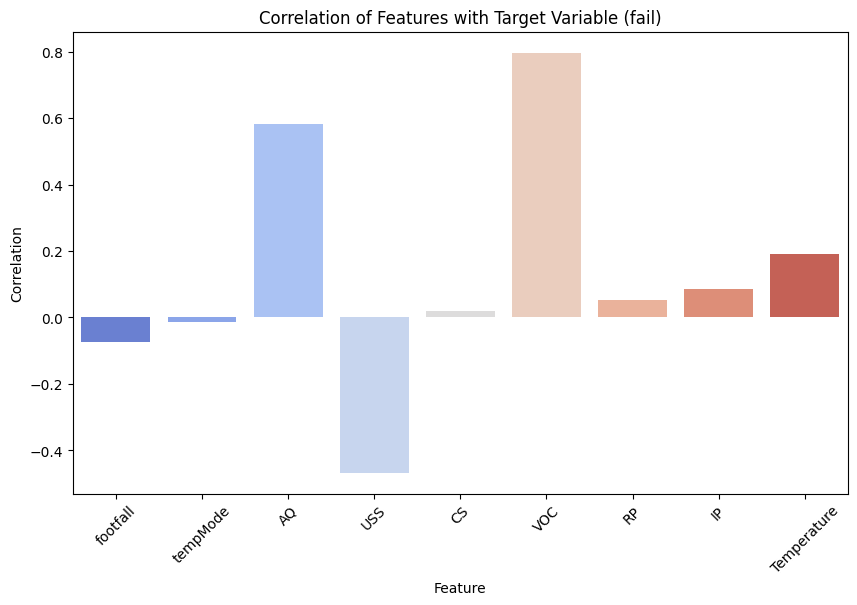

In [9]:
correlation_with_target = df.corrwith(df['fail']).drop('fail')

correlation_with_target = correlation_with_target.to_frame(name='Correlation')
correlation_with_target['Feature'] = correlation_with_target.index


correlation_with_target = correlation_with_target.reset_index(drop=True)

print(correlation_with_target)

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Correlation', data=correlation_with_target, palette='coolwarm')
plt.title('Correlation of Features with Target Variable (fail)')
plt.xticks(rotation=45)
plt.show()

## Splitting of data

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('fail',axis=1),df['fail'],test_size=0.2,random_state=42)

## Training models

### XGBOOST

In [28]:
xg = xgb.XGBClassifier(max_depth = 5,verbosity =2,eta=0.02)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.85      0.87      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [29]:
accuracy_score(y_test,y_pred)

0.873015873015873

### Random Forest

In [44]:
rb = RandomForestClassifier(n_estimators=100,random_state=42,criterion="entropy",oob_score=True)
rb.fit(x_train,y_train)
y_pred = rb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       102
           1       0.88      0.89      0.88        87

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [45]:
accuracy_score(y_test,y_pred)

0.8888888888888888